In [2]:
from astrodb_utils.spectra import check_spectrum_plottable
from specutils.manipulation import median_smooth
from astropy.io import fits
import astropy.units as u
import os
import pandas as pd
import numpy as np
from specutils import Spectrum1D, Spectrum
from astropy.wcs import WCS
import matplotlib.pyplot as plt

INFO     - astrodb_utils.publications - logger.parent.name: astrodb_utils, logger.parent.level: 20


This notebook is to plot:  
- 2 FIRE_Magellan spectra (txt format)      


In [3]:
path = "/Users/guanying/SIMPLE db/SIMPLE-db/scripts/spectra_convert/zhang18/sty2054_supplemental_files/"

Reading file: ULAS_J124947.04+095019.8_sdL1_FIRE_Magellan_Primeval-I.txt


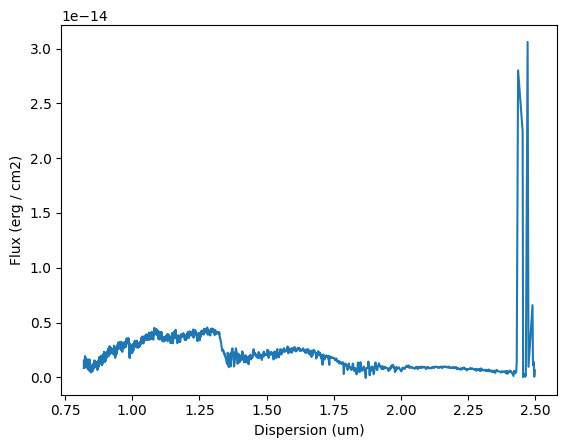

Try smoothing with width 11


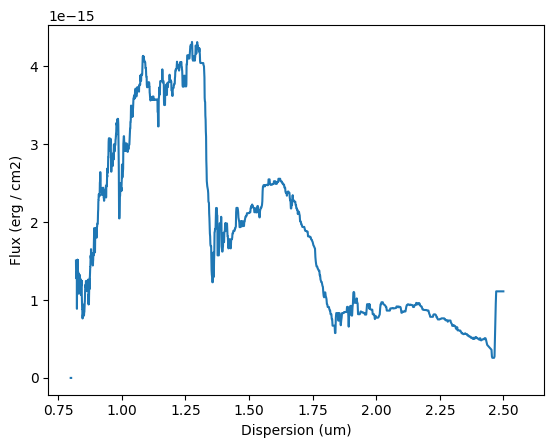

Reading file: ULAS_J133836.97-022910.7_sdL7_FIRE_Magellan_Primeval-I.txt


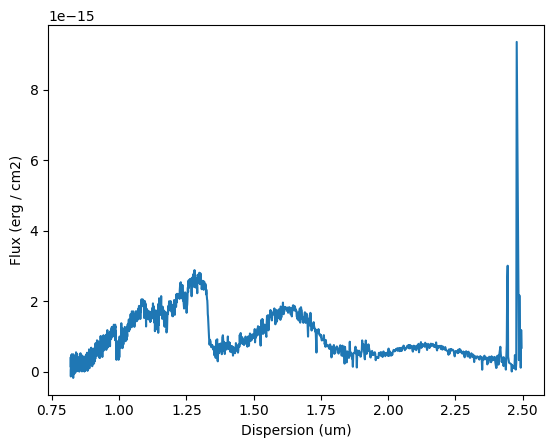

Try smoothing with width 11


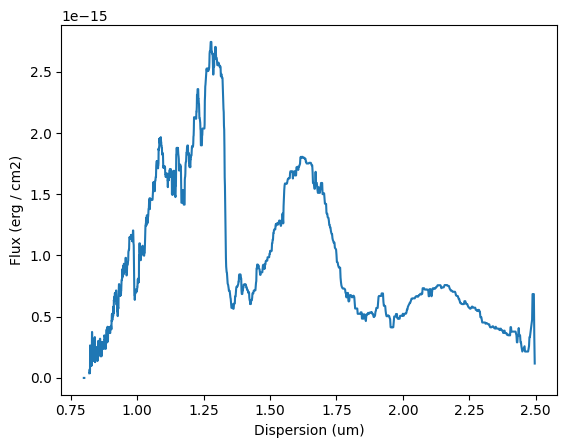

Total files plotted: 2
Total files failed: 0
Failed files:  []


In [4]:
# Plotting FIRE instrument files
plotted_file = 0
failed_file = 0
file_failed = []

for filename in os.listdir(path):
    if "fire" in filename.lower():
        file_path = os.path.join(path, filename)
        
        try:
            print(f"Reading file: {filename}")
            data = np.loadtxt(file_path, comments="#", encoding="latin1")

            # column1: #w         column2:flux          
            if (filename == "SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt"):
                wavelength = (data[:, 0] * u.AA).to(u.um)
                flux = data[:, 1] * (u.erg / (u.cm**2 * u.s * u.micron))

            # column1: #w (micron)         column2:flux          
            else:
                wavelength = (data[:, 0] * u.um)
                flux = data[:, 1] * (u.erg / (u.cm**2))

            # check plottability
            spectrum = Spectrum(spectral_axis=wavelength, flux=flux)
            check_spectrum_plottable(spectrum, show_plot=True)
            plotted_file += 1

            # Smooth
            print("Try smoothing with width 11")
            smoothed_spectrum = median_smooth(spectrum, width=11)
            check_spectrum_plottable(smoothed_spectrum, show_plot=True)
        
        except Exception as e:
            print(f"Could not read {filename}: {e}")
            failed_file += 1
            file_failed.append(filename)
print(f"Total files plotted: {plotted_file}")
print(f"Total files failed: {failed_file}")
print("Failed files: ", file_failed)

